<a href="https://colab.research.google.com/github/ChinmaySN/customer-insurance-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Evaluation Metrics ===
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.881503   0.893082  0.975945  0.932677  0.878725
1     K-Nearest Neighbors  0.832370   0.903114  0.896907  0.900000  0.819431
2  Support Vector Machine  0.881503   0.885802  0.986254  0.933333  0.838738
3           Decision Tree  0.817919   0.910072  0.869416  0.889279  0.707435
4           Random Forest  0.806358   0.900000  0.865979  0.882662  0.867541


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


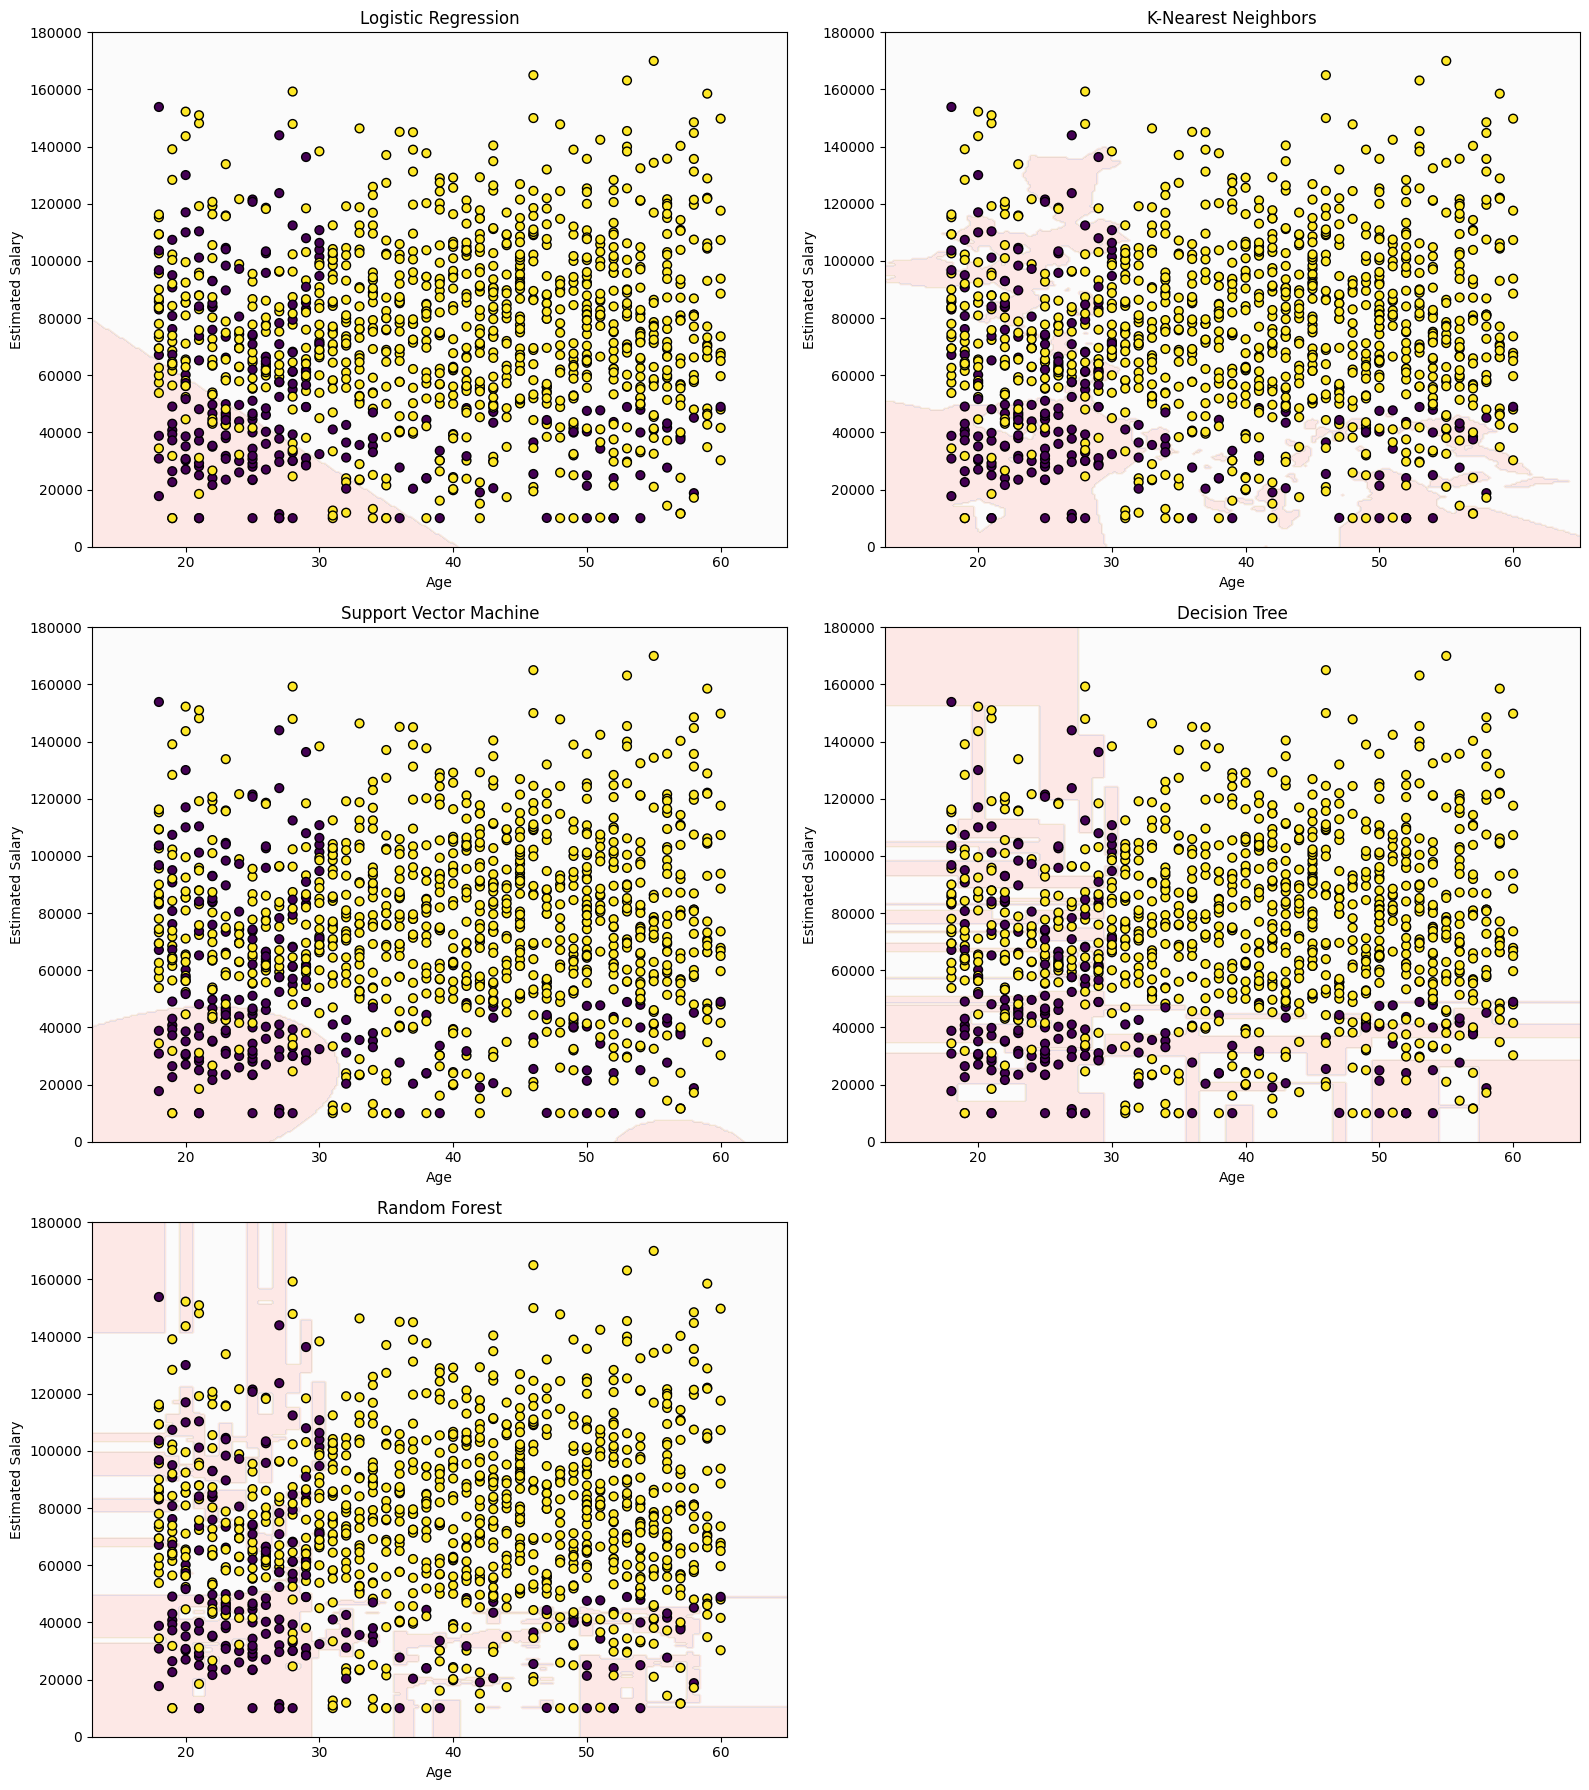

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv("insurance_data.csv")

# Features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Display results
results_df = pd.DataFrame(results)
print("\n=== Evaluation Metrics ===")
print(results_df)

# Plotting function
def plot_real_values_boundary(model, scaler, ax, title):
    # Create grid in original scale
    age_range = np.linspace(X['Age'].min()-5, X['Age'].max()+5, 300)
    salary_range = np.linspace(X['EstimatedSalary'].min()-10000, X['EstimatedSalary'].max()+10000, 300)
    xx, yy = np.meshgrid(age_range, salary_range)

    # Flatten and scale grid for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
    ax.scatter(X['Age'], X['EstimatedSalary'], c=y, edgecolors='k', cmap='viridis', s=40)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")

# Plot all models in one big figure
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    plot_real_values_boundary(model, scaler, axes[i], title=name)

# Remove the 6th unused subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [8]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['Logistic Regression'], 'logistic_model.pkl')
joblib.dump(models['Support Vector Machine'], 'svm_model.pkl')
joblib.dump(models['Decision Tree'], 'decision_tree_model.pkl')
joblib.dump(models['K-Nearest Neighbors'], 'knn_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [9]:
import joblib
import pandas as pd

# Load all models and the shared scaler
scaler = joblib.load('scaler.pkl')
knn_model = joblib.load('knn_model.pkl')
svm_model = joblib.load('svm_model.pkl')
logistic_model = joblib.load('logistic_model.pkl')
decision_tree_model = joblib.load('decision_tree_model.pkl')
random_forest_model = joblib.load('random_forest_model.pkl')

# Define prediction functions
def knn_predict(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    input_scaled = scaler.transform(input_df)
    pred = knn_model.predict(input_scaled)[0]
    return "Will Buy Insurance" if pred == 1 else "Will NOT Buy Insurance"

def svm_predict(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    input_scaled = scaler.transform(input_df)
    pred = svm_model.predict(input_scaled)[0]
    return "Will Buy Insurance" if pred == 1 else "Will NOT Buy Insurance"

def logistic_predict(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    input_scaled = scaler.transform(input_df)
    pred = logistic_model.predict(input_scaled)[0]
    return "Will Buy Insurance" if pred == 1 else "Will NOT Buy Insurance"

def decision_tree_predict(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    input_scaled = scaler.transform(input_df)
    pred = decision_tree_model.predict(input_scaled)[0]
    return "Will Buy Insurance" if pred == 1 else "Will NOT Buy Insurance"

def random_forest_predict(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    input_scaled = scaler.transform(input_df)
    pred = random_forest_model.predict(input_scaled)[0]
    return "Will Buy Insurance" if pred == 1 else "Will NOT Buy Insurance"


In [10]:
knn_predict(25, 60000)

'Will Buy Insurance'

In [11]:
svm_predict(40, 100000)

'Will Buy Insurance'

In [12]:
logistic_predict(35, 55000)

'Will Buy Insurance'

In [13]:
decision_tree_predict(45, 25000)

'Will NOT Buy Insurance'

In [20]:
random_forest_predict(20, 20000)

'Will NOT Buy Insurance'